# Analysis Work
I will be doing all of my work for this zillow project in this notebook and later condense it into a seperate notebook as a Final Report for my presentation.

<hr style="border:2px solid blue"> </hr>

# Acquire

In [45]:
# Data Science Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from env import host, user, password
import os

# My Zillow Functions
import wrangle

# Block Warning Boxes
import warnings
warnings.filterwarnings("ignore")


For now I am only going to acquire `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, and `fips` from the zillow database for all 'Single Family Residential' properties. This should allow me to get my MVP.


In [2]:
def get_connection(database_name):
    '''
    This function takes in a string representing a database name for the Codeup mySQL server 
    and returns a string that can be used to open a connection to the server.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{database_name}'


In [3]:
def get_zillow_data():
    '''
    This function reads the Zillow database from the Codeup mySQL server and  returns a dataframe.
    If a local file does not exist, this function writes data to a csv file as a backup. The local file 
    ensures that data can be accessed, in the event that you cannot talk to the mySQL database. 
    '''
    # The filename will have 2017 at the end to represent that the only data being looked at is 
    # properties from the year 2017
    if os.path.isfile('zillow2017.csv'):
        # If csv file exists read in data from csv file.
        df = pd.read_csv('zillow2017.csv', index_col=0)
        
    else:
        
        # Read fresh data from database into a DataFrame
        # property land use type id is limited to 'Single Family Residential' properties.
        df =  pd.read_sql(""" SELECT bedroomcnt, 
                                     bathroomcnt, 
                                     calculatedfinishedsquarefeet, 
                                     yearbuilt, 
                                     regionidzip, 
                                     fips,
                                     taxvaluedollarcnt
                              FROM properties_2017
                              JOIN predictions_2017 USING (parcelid)
                              WHERE propertylandusetypeid = 261;""", 
                            get_connection('zillow')
                        )
        # Cache data into a csv backup
        df.to_csv('zillow2017.csv')
    
    # Renaming column names to one's I like better
    df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'squarefeet',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built'})   
    return df

I noticed there is an 'Inferred Family Housing' properties type. Upon inspection, I decided not to add this to my dataframe because it only contained a single row with nulss.

In [4]:
zillow = get_zillow_data()
zillow.head()

bedrooms  bathrooms  squarefeet  year_built  regionidzip    fips  tax_value
0       4.0        3.5      3100.0      1998.0      96978.0  6059.0  1023282.0
1       2.0        1.0      1465.0      1967.0      97099.0  6111.0   464000.0
2       3.0        2.0      1243.0      1962.0      97078.0  6059.0   564778.0
3       4.0        3.0      2376.0      1970.0      96330.0  6037.0   145143.0
4       4.0        3.0      2962.0      1950.0      96293.0  6037.0   773303.0

In [5]:
zillow.shape

(52442, 7)

In [6]:
zillow.describe()

bedrooms     bathrooms    squarefeet    year_built    regionidzip  \
count  52442.000000  52442.000000  52360.000000  52326.000000   52416.000000   
mean       3.300675      2.299397   1922.874083   1963.393820   96635.843559   
std        0.949086      1.022764   1004.363491     23.133355    4605.063649   
min        0.000000      0.000000    128.000000   1878.000000   95982.000000   
25%        3.000000      2.000000   1268.000000   1950.000000   96206.000000   
50%        3.000000      2.000000   1659.000000   1961.000000   96412.000000   
75%        4.000000      3.000000   2306.000000   1979.000000   96995.000000   
max       14.000000     18.000000  21929.000000   2016.000000  399675.000000   

               fips     tax_value  
count  52442.000000  5.244100e+04  
mean    6049.131917  5.296830e+05  
std       21.028933  7.518883e+05  
min     6037.000000  1.000000e+03  
25%     6037.000000  1.937500e+05  
50%     6037.000000  3.736120e+05  
75%     6059.000000  6.193010e+05  
max     6111.000000  4.906124e+07

Looks like the average bedroom count is 3 and average bathroom count is 2. I'll keep this in mind when I get to explore and modeling.

<span style="color: red">


# Wrangle (.ipynb) - Using your Modules
After creating the wrangle module(s), you want to import those into your final report so that you can use those functions you wrote to acquire and prepare your data with ease, with little clutter, and with reduced risk of running into issues when reproducing the report. The functions should be called to prepare your data (as opposed to re-writing the code of the functions in your notebook), and you should include in a markdown cell, the steps you took to prepare the data and why you made the decisions you did.

# Wrangle (.py or Documented in .ipynb) - Missing Values
Decisions made and reasons are communicated and documented for handling missing values. If you imputed based on computing a value (such as mean, median, etc), that was done after splitting the data, and the value was derived from the training dataset only and then imputed into all 3 datasets. If you filled missing values with 0 or a constant not derived from existing values, that can be done prior to splitting the data.

# Wrangle (.ipynb) - Data Split Timing and Samples
Data should always be split into 3 samples, Train, Validate & Test, prior to exploration of variable relationships. In addition, imputers, scalers, feature elimination or selection algorithms should all be run after the split so that they are fit on train and transformed on validate and test.
    
# Wrangle (.py) - SQL
Accurate sample was acquired from the mySQL zillow database. Properties_2017 table was used. Predictions_2017 was used to filter to properties that had a transaction during 2017. Properties were then filtered down to the single family homes only. You should have ended with 52,442 properties based on that criteria. Be sure and add a conditional statement to your acquire script to read a local csv of the sample that you saved so you don't have to run the query every time you re-run your notebook!

# Wrangle (.py) - Module
Module(s) with user-defined functions for acquiring and preparing the data should be created. Each function contains a helpful docstring explaining what it does, its input(s) and output(s). Credentials (such as in an env.py file) are NOT included in the public repo.

# Wrangle (.py) - Data Split Reproducible
When splitting data into samples, someone should be able to run your code and get the same observations in the same samples, i.e. reproduce your split, because you set the random state to a seed. There should be 3 adequately sized samples - train, validate, and test. As a good starting point, 50%, 30%, and 20%, (or 50%, 26%, 24% for simplicity when doing the splitting) are reasonable split proportions. But that can vary depending on the number of observations you have. Test can go as low as 10% if needed.
    

# Wrangle - Scaling
If you are performing regression, clustering or otherwise using algorithms that incorporate a distance metric (such as KNN), your features must on the same scale when modeling. A scaler object must be fit on train and then transformed on all 3 datasets (train, validate, test).

    
    
    
# Explore (.ipynb) - Ask clear question, [discover], provide a clear answer
At least 4 of the questions asked and answered of the data are shared in the final report notebook. You should call out questions of the data using natural language that speaks to the business stakeholders in markdown cells, ideally a header prior to the visualization or statistical test, that you then explore. This does not take the place of stating your null hypothesis/alternative hypothesis when doing a statistical test. But those hypotheses are generally for you. By writing questions that you intend to answer with visualizations and statistical tests in natural language, like "Are office supplies leading to differences in profit in Texas?", you are able to guide both yourself and your reader through the highlights of your analysis. You ask a question, create a visual, run a statistical test (if appropriate), and wrap it nicely with a markdown cell that contains a clear answer in layman's terms. You do all that before moving to the next question.

# Explore (.ipynb) - Exploring though visualizations
At least 5 visualizations are included in your final report. The ones included answer a question (remember, NO is an answer) and the one(s) to provide necessary context (such as the distribution of the target variable). All statistical tests included in the final report should be supported with an visualization of the interaction of the variables being tested. Charts in the final report should have titles and labels that are descriptive and useful for the end user/audience/consumer of the report. All visualizations in the final report are mentioned or discussed if a verbal presentation is given.

# Explore (.ipynb) - Statistical tests
At least 2 statistical tests are included in your final report. The correct tests are run, given the data type and distribution, and the correct conclusions are drawn. - correlation: 2 continuous variables, normally distributed, testing for LINEAR correlation only (H_0: Not linearly dependent) - independent t-test: 1 continuous, somewhat normally distributed variable, one boolean variable, equal variance, independent (H_0: population mean of each group is equal) - chi-square test: 2 discrete variables. (H_0: the 2 variables are independent of each other). (other tests may be used)
    
# Explore (.ipynb) - Summary
Following your exploration section, you summarize your analysis (in a markdown cell using natural language): what you found and how you will use it moving forward. This includes key takeaways from all the questions answered in explore, a list of which features will be used in modeling and why, and which features will not move forward and why. You may only call out a few of these features in the presentation, but having that there for reference is important in a report. A group of features may have the same reason why, and those can be mentioned together.

    
    
    
# Modeling (.ipynb) - Evaluate Baseline
Having a baseline tells you whether a model you build using the features you selected is any better than predicting by using only the target variable. One way a baseline is created in classification is by making predictions purely based on the most common outcome class, like predicting that all titanic passengers will die, becuase the majroity did die. By doing that, you end up with the highest accuracy without using extra information from features. The baseline is based on the training dataset. For a continuous target variable, the baseline could be predicting that all salaries will be the median salary of our labeled train data. The predictions should be made on the training data using this information (like the predicted value, y_hat, for all passengers "survived" == 0) and then performance evaluated to measure your models against. If any model you build does not perform as well as a baseline that uses no features, then your features are not significant drivers of the outcome.

# Modeling (.ipynb) - Evaluate on Train
All models should be evaluated on train: the training smaple is our largest sample, and it is a sample of data we have to both fit the model AND see how the model performs. We should never skip straight to validate. We would be missing out on valuable observations.

# Modeling (.ipynb) - Evaluate on Validate
The top models should be evaluated with the validation sample dataset. It is important to use the validate sample for checking for any overfitting that may have occurred when fitting the model on train. If you are creating 10's of models, it is also important to only validate a handful of your top models with the Validate dataset. Otherwise, your data will have seen validate as much as train and you could accidentally introduce some implicit bias based on data and results you see while validating on so many models.

# Modeling (.ipynb) - Select Evaluation Metric
Clear communication as to how you evaluated and compared models. What metric(s) did you use and why? For example, in one case, you may decide to use precision over accuracy. If so, why? If you use multiple metrics, how will you decide which to select if metric is better for model A but another is better for model B? Will you rank them? Find a way to aggregate them into a single metric you can use to rank?
    
# Modeling (.ipynb) - Evaluate Top Model on Test
Your top performing model, and only your top performing model should be evaluated on your test dataset. The purpose of having a test dataset to evaluate only the final model on is to have an estimate of how the model will perform in the future on data it has never seen.

# Modeling (.ipynb) - Develope 3 Models
The 3 models can differ based on the features used, the hyperparameters selected, and/or the algorithm used to fit the data.
    
    
    
    
# Report Notebook (.ipynb) - Code Commenting
Your code contains code comments that are helpful to the reader in understanding what each blocks/lines of code are doing.

# Report Notebook (.ipynb) - Markdown
Notebook contains adequate markdown that documents your thought process, decision making, and navigation through the pipeline. This should be present throughout the notebook consistently, wtih not just headers, but plenty of content that guides the reader and leaves no questions or doubt as to why you did something, e.g.

# Report Notebook (.ipynb) - Written Conclusion Summary
Your conclusion summary should addresses the questions you raised in the opening of the project, which we would want to see at the end of every final notebook. Ideally, when the deliverable is a report, the summary should tie together your analysis, the drivers of the outcome, and how you would expect your ML model to perform in the future on unseen data, in layman's terms.

# Report Notebook (.ipynb) - Conclusion Recommendations
Your notebook should end with actionable recommendations based on your insights and analysis on a way to make a better model, such as a new feature or an algorithm or something you found that doesn't work.
    
# Report Notebook (.ipynb) - Conclusion Next Steps
Your conclusion should include next steps from a data science perspective that will assist in improving your research. Ideally, if you talk about trying more algorithms to improve performance, think about why you need to improve performance. And if the business calls for it, remember the best way to improve performance is to have better predictors/features. If you talk about gathering more data, being specific about what data you think will help you understand the problem better and why is the way to go!

# Report Notebook (.ipynb) - No Errors    
Your final notebook should run without error. One error in a notebook can lead to the rest of it erroring out. If you have a reader who doesn't know python, they will then not be able to consume your report.
  
    
    
    
# Presentation (live) - Audience & Setting
Always be aware of the audience and setting for your presentation. What is the appropriate level of technicality? What is the appropriate depth given audience, setting and medium in which its delivered. The way you communicate should be appropriate for the audience: volume, speed of talk, flow, professionalism. (Zillow Data Science Team, virtually delivered via jupyter notebook).

# Presentation (live) - Content
Notebook talked through step-by-step, in an understandable and meaningful way. Extraneous content in the notebook is not present.
    
# Presentation (live) - Verbal Conclusion (findings, next steps, recommendations)
Presentation is concluded with a summary of what was found, recommendations, and next steps. The presentation does not just drop off after modeling, but the entire project is nicely tied up and summarized.
    
# Presentation (live) - Time
Time limit of 5 minutes is adhered to. The time is managed well, in that there is appropriate time spent on each section. The time of 5 minutes should not be met by talking quickly but by reducing the amount or depth of information conveyed, and by finding easier and more simplified methods to convey the more complex information. The speech should be natural, and take the time needed for the audience to consume the information. So the time is well spent when you have practiced and you have taken the extra time it takes to reduce the content in your notebook and presentation. Time should not be spent scrolling through 10's of visualizations or hundreds of lines of code.

    
    
    
# Project Planning (Readme) - The Plan
Your readme should include a project plan which helps guide both the user and yourself through the different stages of the pipeline and steps you took to get to your conclusion.
    
# Project Planning (Readme) - Data Dictionary
Your readme should include a data dictionary, which is important to provide in order to define and disambiguate each of the variables you are analyzing.
    
# Project Planning (Readme) - Steps to Reproduce
Your readme should include useful and adequate instructions for reproducing your analysis and final report.

# Project Planning (Readme) - Project Goal(s)
Your readme should include a clear project goal that reflect on what you are trying to achieve for the business/organization (in the scenario layed out). Your goal is never just to create an algorithm or model or to purely make discoveries in exploration...it includes the why. "My goal is to..., so that..." Your goal should be specific enough to know when you have reached it and concise enough to keep in 1-2 sentences. "My goal is to identify key drivers of churn, which customers at risk of churn, and make recommendations for changes so that we can reduce the monthly churn rate and increase customer retention." This helps tell you when you have reached a minimally viable product (including a presentation and predictions, in this example scenario).
    
# Project Planning (Readme) - Project Description
Your readme should include a project description that provides context for your project, including explaining why you are tackling this project, why it is important and how it could be of use to someone else beyond just the interest or new knowledge. It dives in a bit deeper than the goals. Project description and goals should always be in your words and specific to your project, not a copy of the class project spec.

# Project Planning (Readme) - Initial Questions
Your readme should include initial questions and focus you are going into the analysis with. This is an important part of project planning and gives context to the reader about where you started, what were your initial ideas and thoughts, and did those play out to be true.















</span>

<hr style="border:2px solid blue"> </hr>

# Prepare

In [7]:
# This dataset is a bit larger, so I will need to set verbose and null_counts to true
zillow.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52442 entries, 0 to 52441
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     52442 non-null  float64
 1   bathrooms    52442 non-null  float64
 2   squarefeet   52360 non-null  float64
 3   year_built   52326 non-null  float64
 4   regionidzip  52416 non-null  float64
 5   fips         52442 non-null  float64
 6   tax_value    52441 non-null  float64
dtypes: float64(7)
memory usage: 3.2 MB


In [8]:
# I can see I have some null values, let's see how many in each column:
zillow.isnull().sum()

bedrooms         0
bathrooms        0
squarefeet      82
year_built     116
regionidzip     26
fips             0
tax_value        1
dtype: int64

In [9]:
# What percentage of my data is this?
zillow.isnull().sum().sum() / zillow.shape[0]

0.004290454216086343

- If I were to remove all rows with nulls, this would remove less than 1% of my data. 
- I think it would be safe to drop all nulls and not have it affect my future explore and modeling


In [10]:
# Dropping all rows with null values
before = zillow.shape[0]
zillow = zillow.dropna()
print ((before - zillow.shape[0]), 'rows dropped')

141 rows dropped


In [11]:
# Making sure my non-null counts look good
zillow.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52301 entries, 0 to 52441
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     52301 non-null  float64
 1   bathrooms    52301 non-null  float64
 2   squarefeet   52301 non-null  float64
 3   year_built   52301 non-null  float64
 4   regionidzip  52301 non-null  float64
 5   fips         52301 non-null  float64
 6   tax_value    52301 non-null  float64
dtypes: float64(7)
memory usage: 3.2 MB


#### Notes:
Now to take a look at Dtypes for each row.

- I believe Bedrooms are supposed to be whole numbers, so I'll change this row to integers.
- Bathrooms are known to have wierd numbers like 2.5 Bath, so float makes sense here.  
- squarefeet can stay a float 
- I should probably change yearbuilt to an integer
- regionidzip is zipcodes, which we know are integers.  
  
- Also, I googled fips because I didn't know what it was:  
    - Federal Information Processing System (FIPS) Codes for States and Counties. 
    - FIPS codes are numbers which uniquely identify geographic areas.  
  
- It looks like fips are whole numbers, so I'll make that an integer too!   
- tax_value is money, so a float works just fine here


In [12]:
# Just to be sure, I'm going to check and see if any of the bedroom counts utilize this decimal
zillow.bedrooms[(zillow.bedrooms % 1) != 0]

Series([], Name: bedrooms, dtype: float64)

Nope! Looks like I'm okay to change bedrooms into integers.

In [13]:
zillow["regionidzip"] = zillow.regionidzip.astype(int)
zillow["bedrooms"] = zillow.bedrooms.astype(int)
zillow["year_built"] = zillow.year_built.astype(int)
zillow["fips"] = zillow.fips.astype(int)
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52301 entries, 0 to 52441
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     52301 non-null  int64  
 1   bathrooms    52301 non-null  float64
 2   squarefeet   52301 non-null  float64
 3   year_built   52301 non-null  int64  
 4   regionidzip  52301 non-null  int64  
 5   fips         52301 non-null  int64  
 6   tax_value    52301 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 3.2 MB


In [14]:
# I noticed some rows with zero bedrooms. Are there some nulls in my data disguised as zeros?
zillow[(zillow.bathrooms == 0) | (zillow.bedrooms == 0) | (zillow.squarefeet == 0)]

bedrooms  bathrooms  squarefeet  year_built  regionidzip  fips  \
590           0        5.0      5782.0        2006        96120  6037   
2694          0        0.0      1208.0        1990        95984  6037   
2899          0        0.0       280.0        1953        96267  6037   
3261          0        1.0       288.0        1922        96023  6037   
4675          0        1.0       480.0        1948        96217  6037   
...         ...        ...         ...         ...          ...   ...   
51299         0        0.0       984.0        1927        95982  6037   
51811         0        1.0      1150.0        1930        95995  6037   
52163         0        0.0      2307.0        1948        96100  6037   
52175         0        1.0       440.0        1947        96027  6037   
52388         0        1.0      1020.0        1930        95995  6037   

       tax_value  
590    4626995.0  
2694    185161.0  
2899    963472.0  
3261     67521.0  
4675    227272.0  
...          ...  
51299   183027.0  
51811   158000.0  
52163   499000.0  
52175  1374602.0  
52388   104000.0  

[73 rows x 7 columns]

#### That's another 73 rows of data with null values. 
Could these zeros represent a vacant lot that hasn't been built yet? It seems that there is a separate category for this in the database called "Vacant Land - General", so probably not.

- ( 73 + 141 )/52442 = 0.408%
- that's still less than 1% of our original data.
- If I drop these 73 rows with zeros plus the 141 rows with nulls, I will still have lost less than 1% of my data which means it shouldn't effect my exploration and modeling. 

In [15]:
before = zillow.shape[0]
zillow = zillow[(zillow.bathrooms != 0) & (zillow.bedrooms != 0) & (zillow.squarefeet != 0)]
print((before - zillow.shape[0]),"rows dropped" )

73 rows dropped


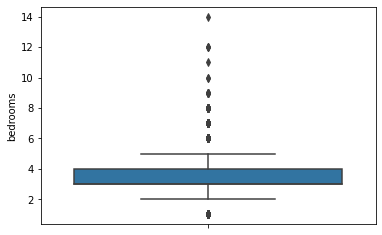

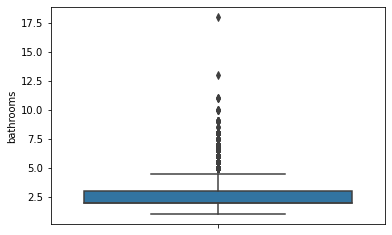

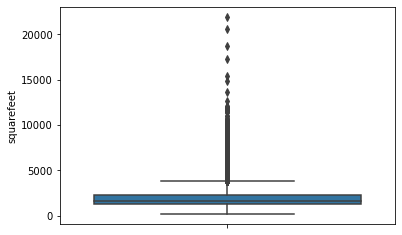

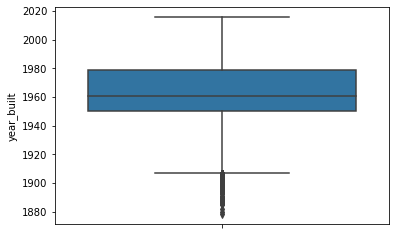

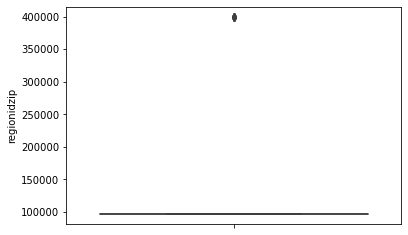

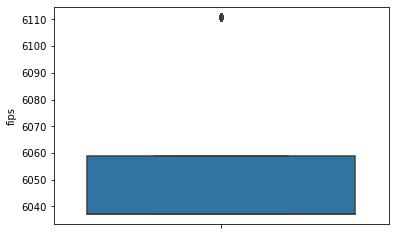

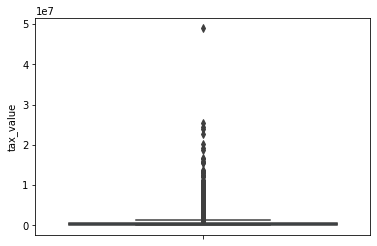

In [16]:
# Next is to look for outliers. I'll start this task by first taking a visual look at my columns. 

columns = zillow.columns

# Create boxplots for each column
for x in columns:
    sns.boxplot(data= zillow, y = x)
    plt.title('')
    plt.show()

- bedrooms: I don't really want a Kim Kardashian house with 14 bedrooms for my model. I believe these houses might be outliers for my Single Family Residential properties. 
- bathrooms: The same can be said for bathrooms.
- squarefeet: I believe taking care of squarefeet might resolve bedrooms and bathrooms
- yearbuilt: I don't see anything worrisome here.
- regionidzip: I'll have to investigate these outliers before removing
- fips: I'll have to investigate these outliers before removing
- tax_value: I'll definitely scale my target to ensure the best model down the line

In [17]:
def remove_outliers(df, k, col_list):
    ''' 
    This dataframe takes in a dataframe, a define k, and the list of columns to be checked for outliers.
    The outliers are removed based on statistical upper and lower bounds, and a dataframe of 
    remaining rows is returned.
    '''

    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # Return dataframe without outliers
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [18]:
before = zillow.shape[0]
zillow = remove_outliers(zillow, 1.5, ['bedrooms', 
                                      'bathrooms', 
                                      'squarefeet', 
                                      #'year_built', 
                                      #'regionidzip',
                                      #'fips', 
                                      'tax_value'])

print((before - zillow.shape[0]), 'rows dropped')

6639 rows dropped


- (6639 + 141 + 73)/52442 = 13.08%
- After removing nulls, zeros, and outliers I have lost approximately 13% of my data. This should still be a low enough number not to affect my exploration and models 

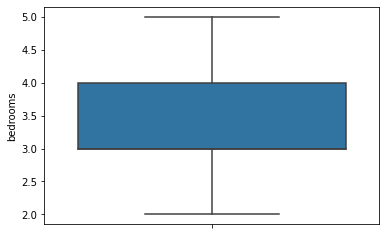

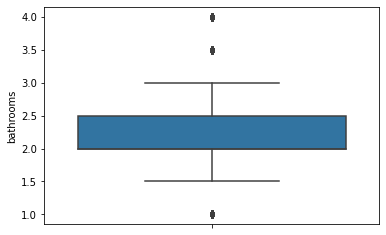

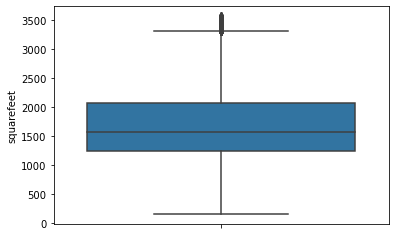

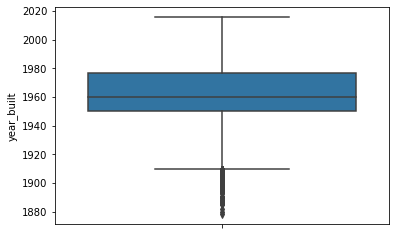

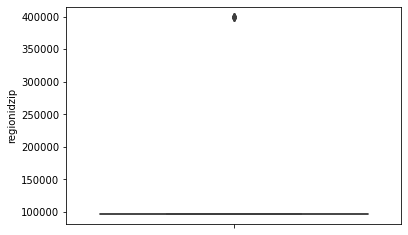

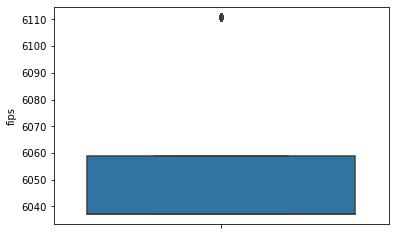

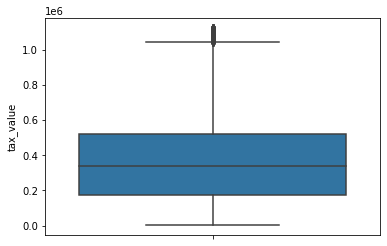

In [19]:
# Let's take another look at our columns after removing the more extreme outliers
for x in zillow.columns:
    sns.boxplot(data= zillow, y = x)
    plt.title('')
    plt.show()

Now that my data is starting to look a lot cleaner, I'm gonna scale it and then I'll be ready to explore!

In [20]:
# First I have to split the data. The scaling has to be fitted, which means I need my Train dataset
# Note: When scaling, fit on train and then apply to validate and test. 
train , validate, test = wrangle.wrangle_zillow()

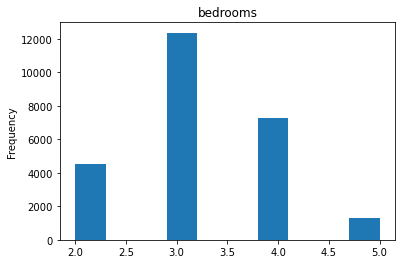

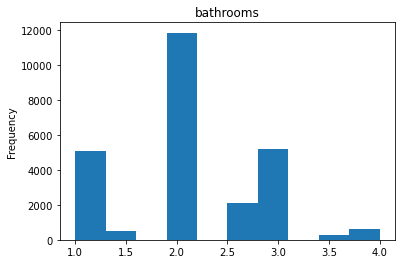

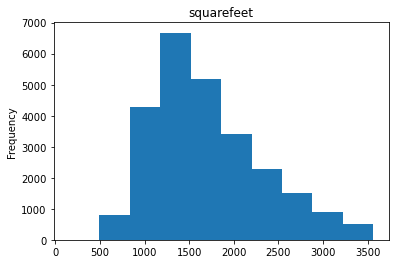

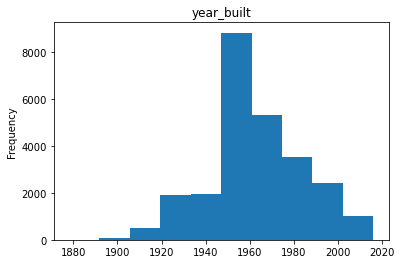

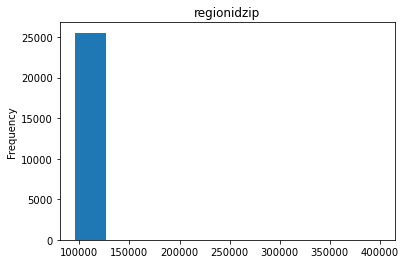

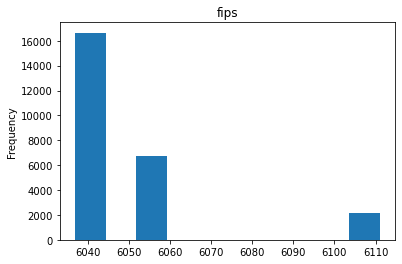

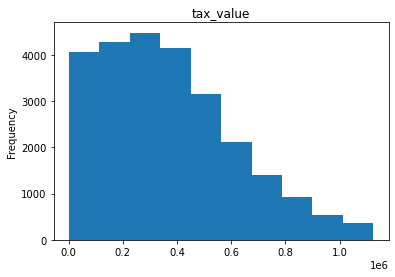

In [21]:
# Let's see what the distributions look like before I start
for x in train.columns: 
    train[ x ].plot.hist(title= x)
    plt.show();

To save some time I will use the function i created in the scaling exercises. I put this zillow dataframe through all the scaler types we learned about and found the Min_Max scaler looked the best. So I will copy that function both here and into my wrangle!

In [22]:
def Min_Max_Scaler(train, validate, test):
    """
    Takes in the pre-split data and uses train to fit the scaler. The scaler is then applied to all dataframes and 
    the dataframes are returned in thier scaled form.
    """
    # 1. Create the object
    scaler = sklearn.preprocessing.MinMaxScaler()

    # 2. Fit the object (learn the min and max value)
    scaler.fit(train[['tax_value', 'squarefeet']])

    # 3. Use the object (use the min, max to do the transformation)
    train[['tax_value', 'squarefeet']] = scaler.transform(train[['tax_value', 'squarefeet']])
    test[['tax_value', 'squarefeet']] = scaler.transform(test[['tax_value', 'squarefeet']])
    validate[['tax_value', 'squarefeet']] = scaler.transform(validate[['tax_value', 'squarefeet']])
    
    return train, validate, test

In [23]:
# Abra-cadabra!
train, validate, test = wrangle.Min_Max_Scaler(train,validate,test)

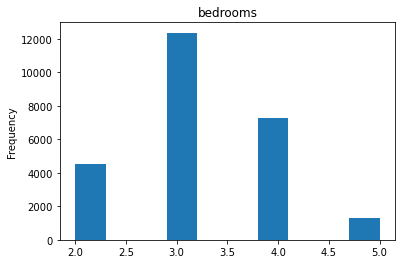

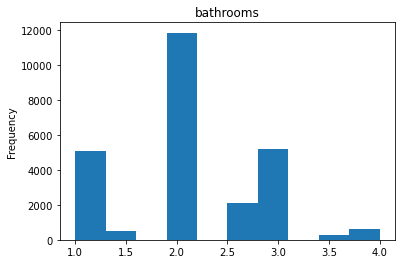

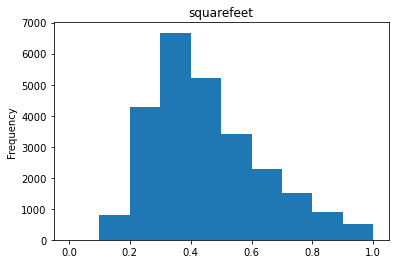

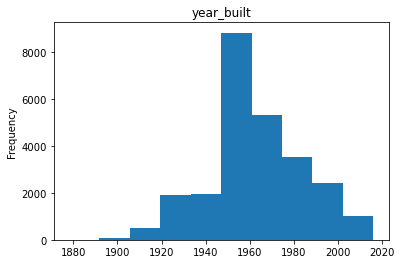

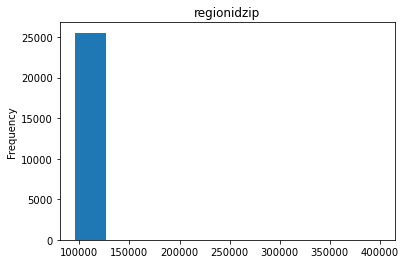

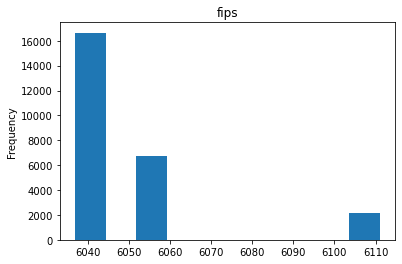

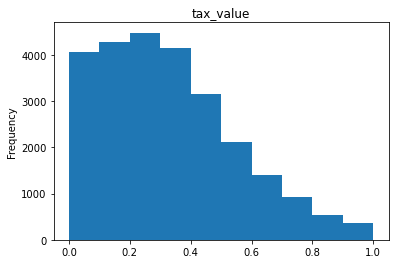

In [24]:
# Let's check how the distributions look with scaling 
for x in train.columns: 
    train[ x ].plot.hist(title= x)
    plt.show();

Looks like that scaling worked nicely! I want to make one more adjustment before exploration though. I've decided I'm going to make a new column based on `year_built`. We'll name it `years_old` so that we can see how old the home is without doing mental math.  

In [25]:
# Notice that since we are working with 2017 data, that I am claculating 
# how old the home was in 2017 and not how old it is today
train['years_old'] = 2017 - train.year_built
validate['years_old'] = 2017 - train.year_built
test['years_old'] = 2017 - train.year_built

train.head()

bedrooms  bathrooms  squarefeet  year_built  regionidzip  fips  \
36317         3        2.0    0.322392        1959        97104  6111   
26167         3        2.0    0.328839        1953        96201  6037   
635           4        2.5    0.596131        1986        97097  6111   
49331         4        3.0    0.588218        1964        97118  6111   
10086         4        2.0    0.351700        1954        96370  6037   

       tax_value  years_old  
36317   0.046060         58  
26167   0.049221         64  
635     0.607301         31  
49331   0.321354         53  
10086   0.414059         63

Almost forgot! The prject specs ask me to find the state and county each home is in, since this effects tax_value. 

In [57]:
# I'm going to start by checking how many different fips I have
train.fips.value_counts()

6037    16647
6059     6725
6111     2157
Name: fips, dtype: int64

- 6037 is Los Angeles County CA
- 6059 is Orange County CA
- 6111 is Ventura County CA

In [66]:
locations_df = pd.DataFrame({'county_name': zillow["fips"].map({6037: "Los Angeles", 6059: "Orange", 6111: "Ventura"})})

locations_df.head()

county_name
0       Orange
1      Ventura
2       Orange
3  Los Angeles
4  Los Angeles

Look's great to me! I'm going to leave this as a separate dataframe for now because I don't want strings in my dataframe when I get to modeling. So I will add these values to the dataframe later.  

Alright! I think my data is throughly prepared and ready for some exploration!

<hr style="border:2px solid blue"> </hr>


# Explore

In [26]:
train.head()

bedrooms  bathrooms  squarefeet  year_built  regionidzip  fips  \
36317         3        2.0    0.322392        1959        97104  6111   
26167         3        2.0    0.328839        1953        96201  6037   
635           4        2.5    0.596131        1986        97097  6111   
49331         4        3.0    0.588218        1964        97118  6111   
10086         4        2.0    0.351700        1954        96370  6037   

       tax_value  years_old  
36317   0.046060         58  
26167   0.049221         64  
635     0.607301         31  
49331   0.321354         53  
10086   0.414059         63

In [43]:
# Taking a look at correlations with my target variable
train.corr()['tax_value'].sort_values()

years_old     -0.230874
regionidzip    0.018265
fips           0.143878
bedrooms       0.195442
year_built     0.230874
bathrooms      0.370899
squarefeet     0.444824
tax_value      1.000000
Name: tax_value, dtype: float64

It looks like my top 3 are 
1. squarefeet
2. bathrooms
3. year_built / years_old

Considering that correlations are more for continuous variables, I can really only accept squarefeet from this list at the moment. You could almost consider bathrooms and year_built/years_old as categorical values.

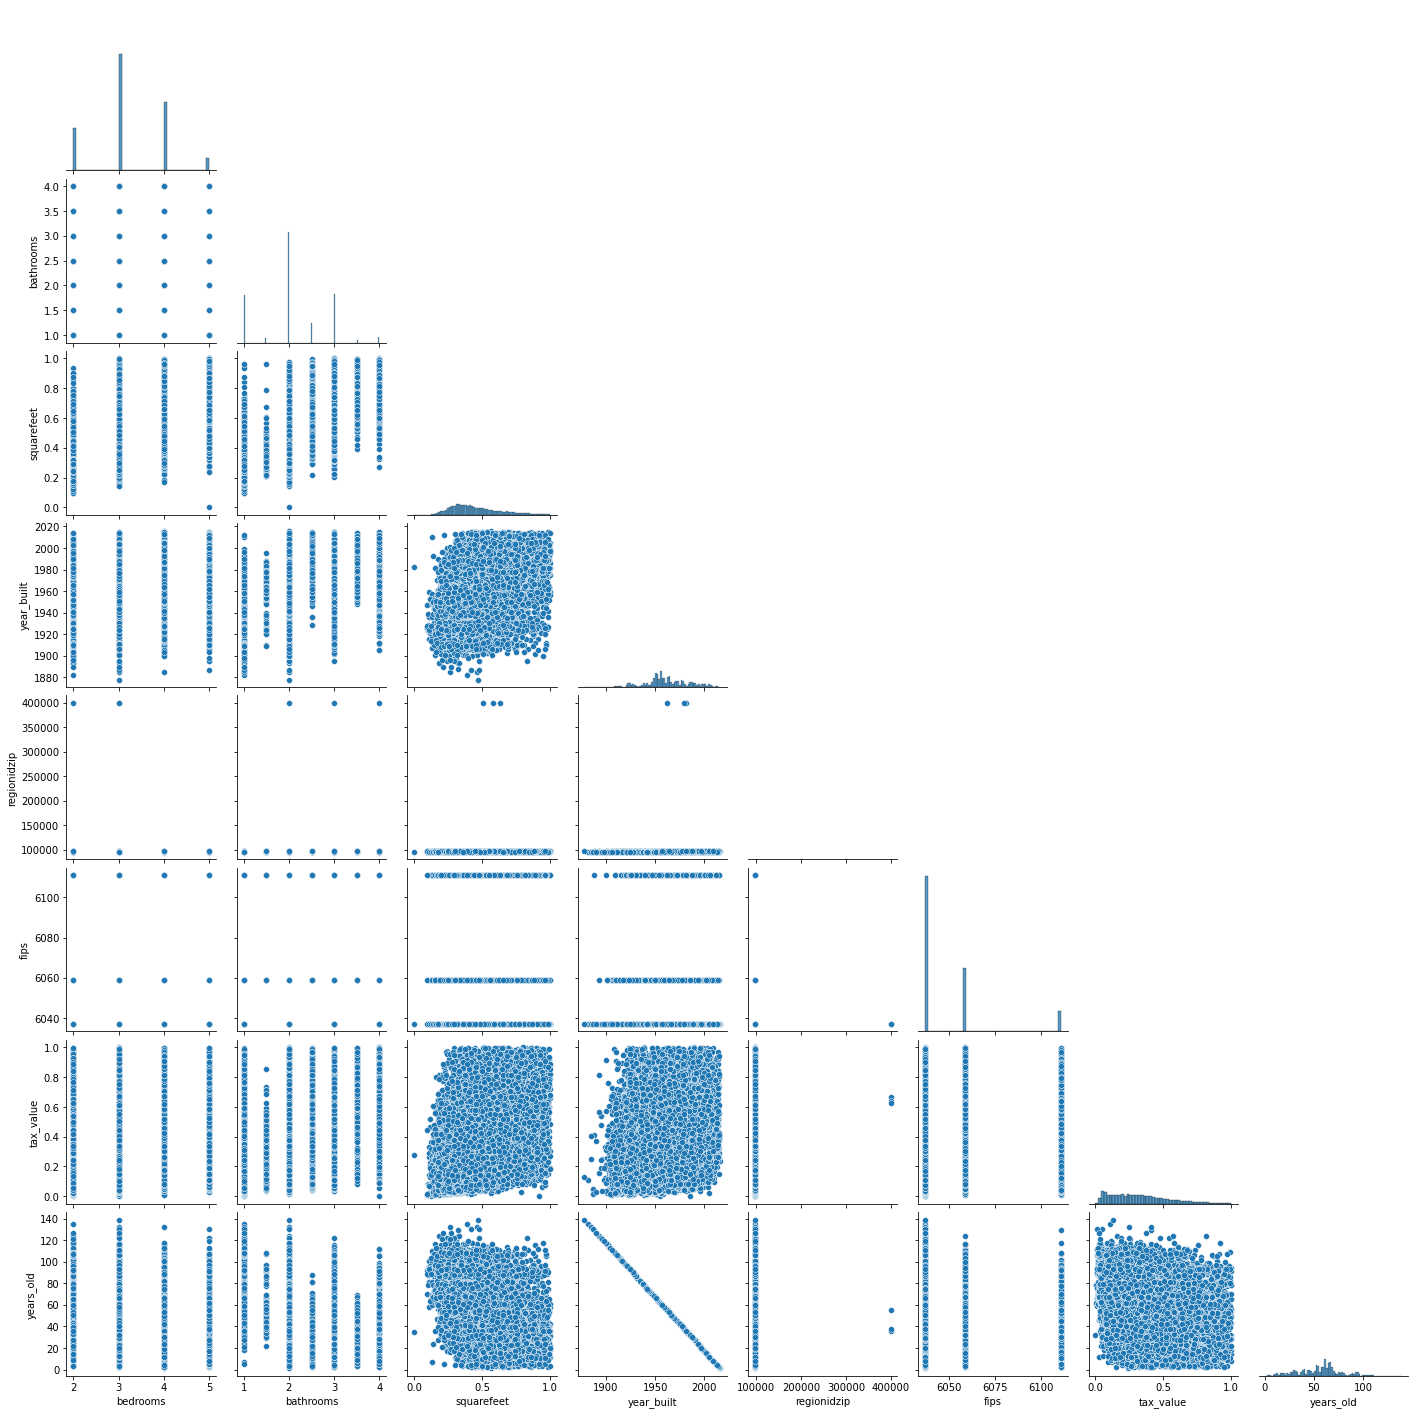

In [30]:
sns.pairplot(train, corner=True);

In [31]:
# define function, arguments are dataframe and two lists of columns.
def plot_categorical_and_continuous_vars(df, continuous, categorical):
    '''
    Takes in a dataframe, a list of continuous variables, and a list of categorical 
    variables of the dataframe as arguments. Creates three different plots of each
    categorical pair.
    '''
    # loop through each column in the first list
    for con in continuous:
        # loop through each column in the second list, creating a loop for each categorical pair
        for cat in categorical:
            # each loop returns three subplots in a figure. Plots a swarmplot, stripplot, and boxplot.
            plt.figure(figsize = (20,10))
            plt.subplot(1,3,1)
            sns.swarmplot(x=df[cat], y=df[con], data=df)
            plt.subplot(1,3,2)
            sns.stripplot(x=df[cat], y=df[con], data=df)
            plt.subplot(1,3,3)
            sns.boxplot(x=df[cat], y=df[con], data=df)

In [36]:
continuous = ['tax_value','squarefeet']
categorical= ['bedrooms','bathrooms','years_old','regionidzip']
train.sample(10_000)

bedrooms  bathrooms  squarefeet  year_built  regionidzip  fips  \
19009         3        2.0    0.284584        1949        96364  6037   
51793         3        3.0    0.563599        1954        96426  6037   
24143         3        2.5    0.584701        1972        96961  6059   
47874         4        3.0    0.475967        1979        96373  6037   
1360          3        2.0    0.480657        1977        96995  6059   
...         ...        ...         ...         ...          ...   ...   
12101         3        1.5    0.277843        1964        96964  6059   
19513         3        2.0    0.397714        1953        96364  6037   
47418         3        2.0    0.368113        1954        96364  6037   
49261         4        2.0    0.563892        2005        97330  6037   
37240         3        1.0    0.252638        1958        96278  6037   

       tax_value  years_old  
19009   0.363343         68  
51793   0.531878         63  
24143   0.540809         45  
47874   0.408726         38  
1360    0.402149         40  
...          ...        ...  
12101   0.304240         53  
19513   0.081122         64  
47418   0.162361         63  
49261   0.023760         12  
37240   0.039453         59  

[10000 rows x 8 columns]

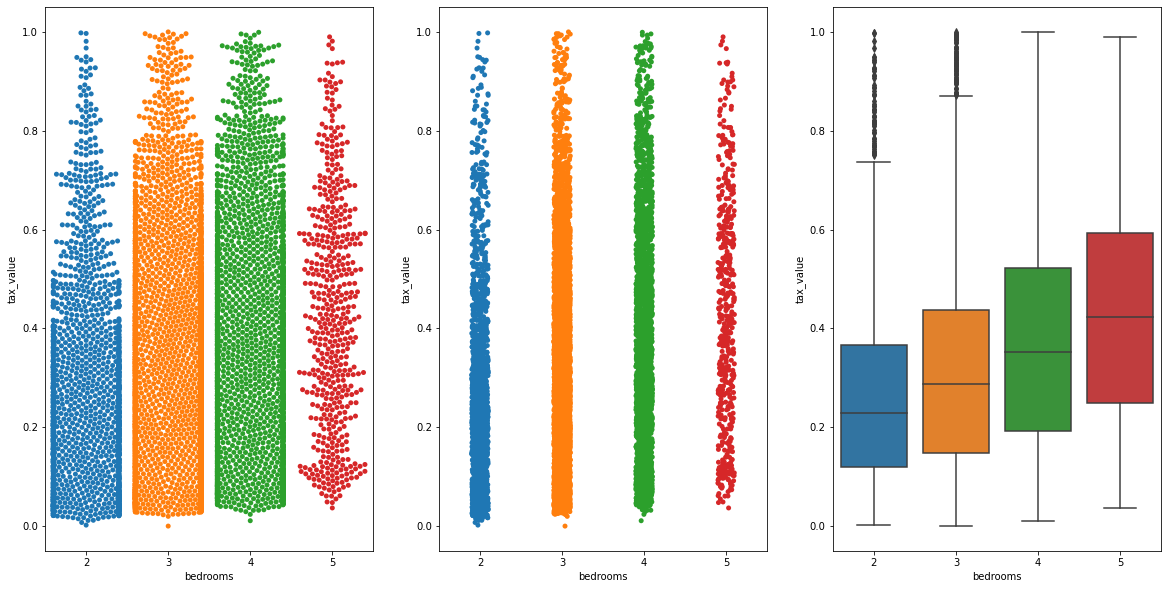

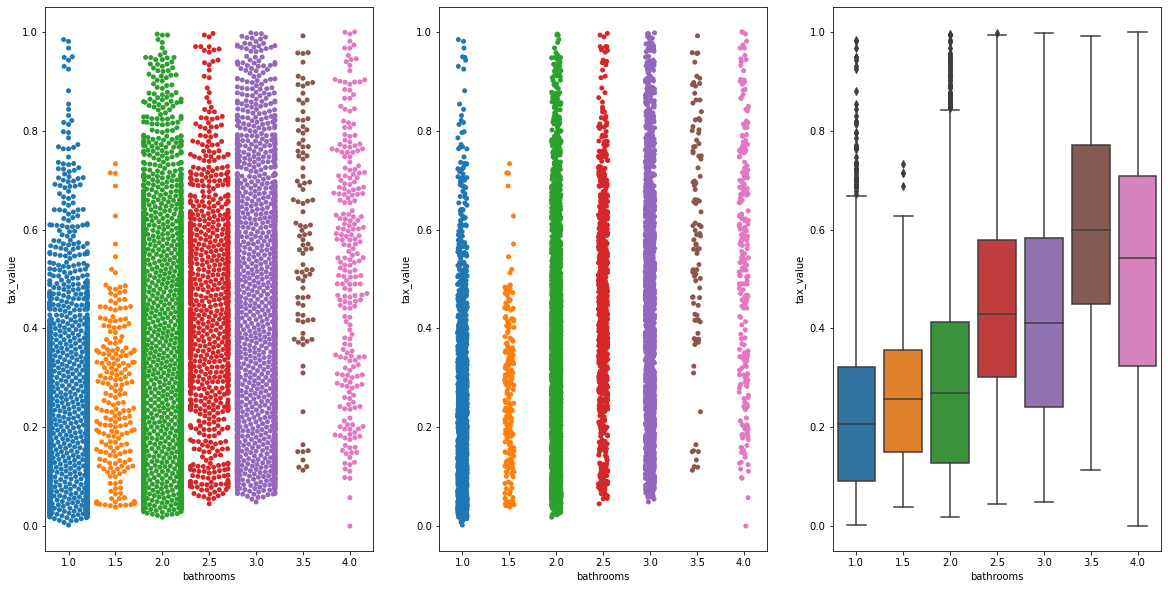

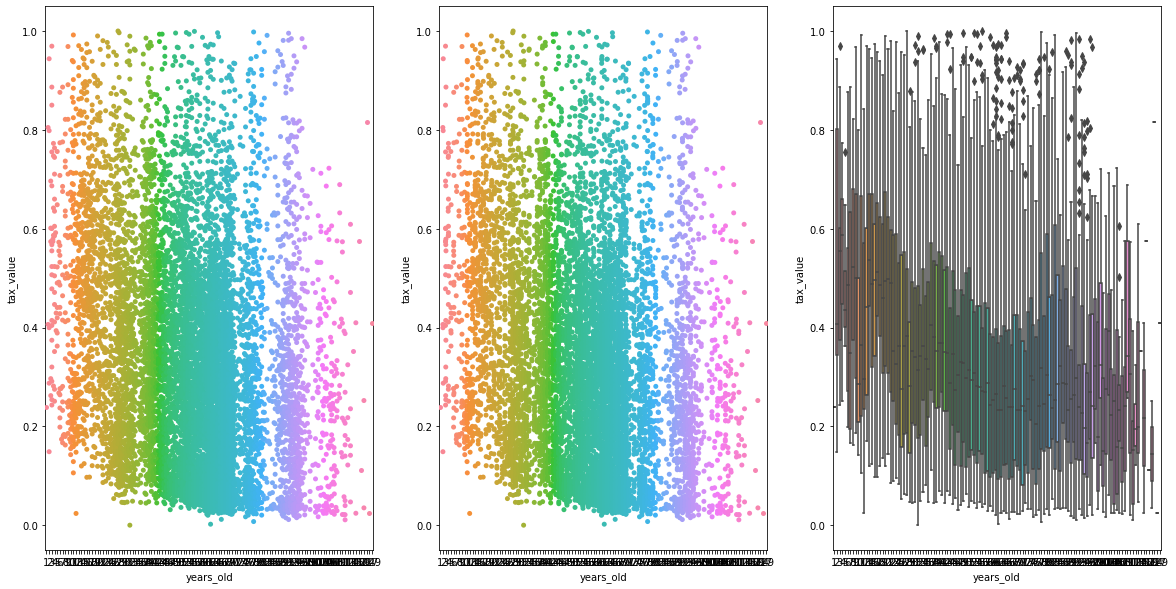

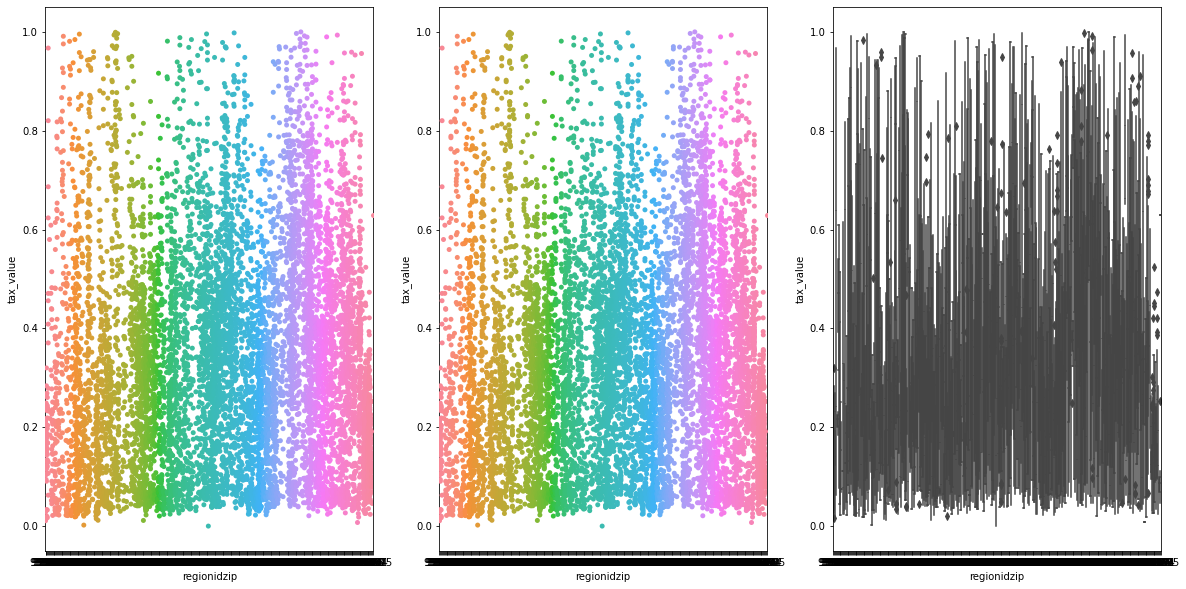

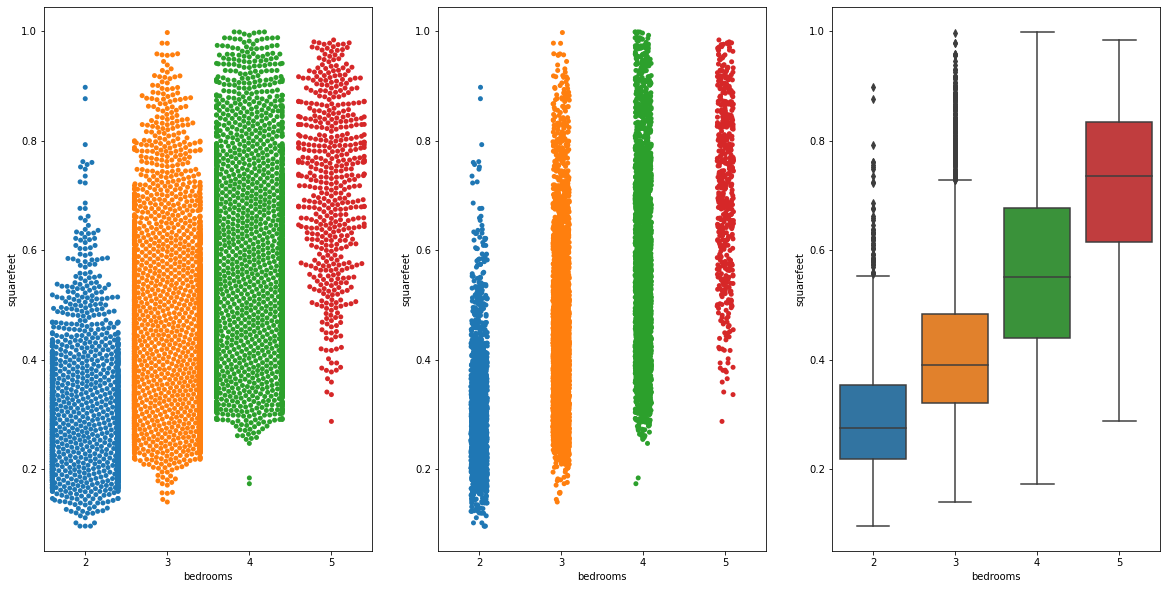

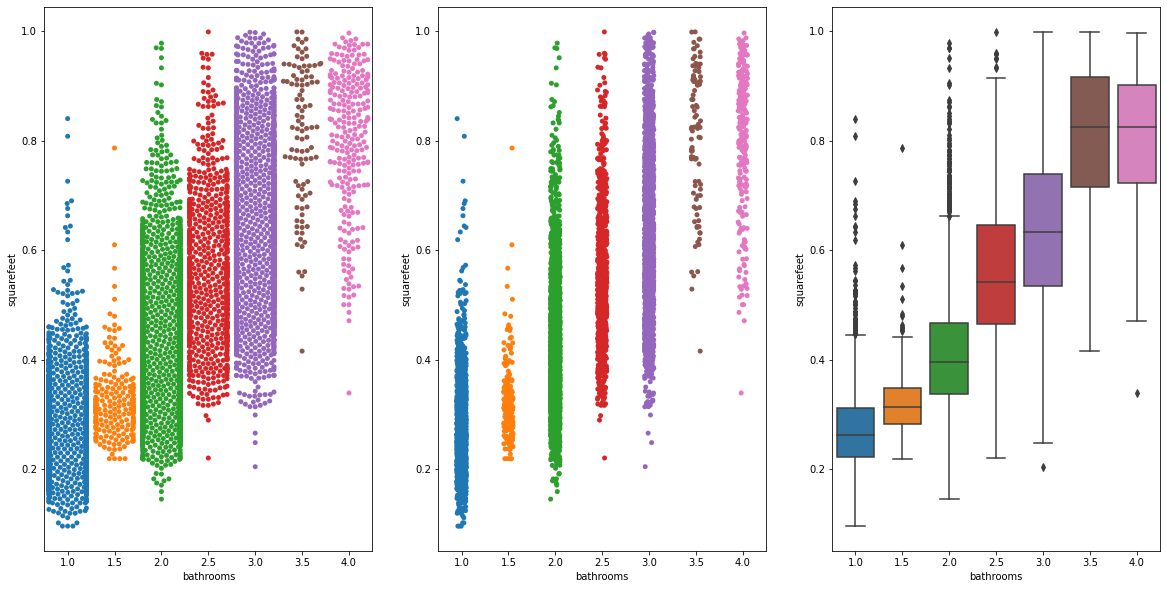

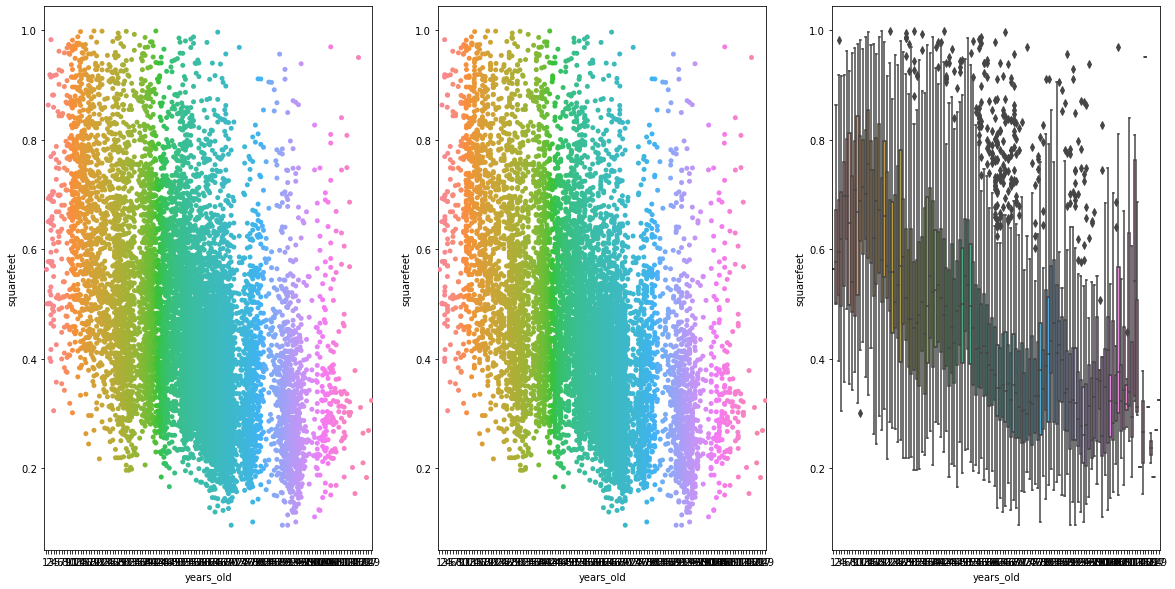

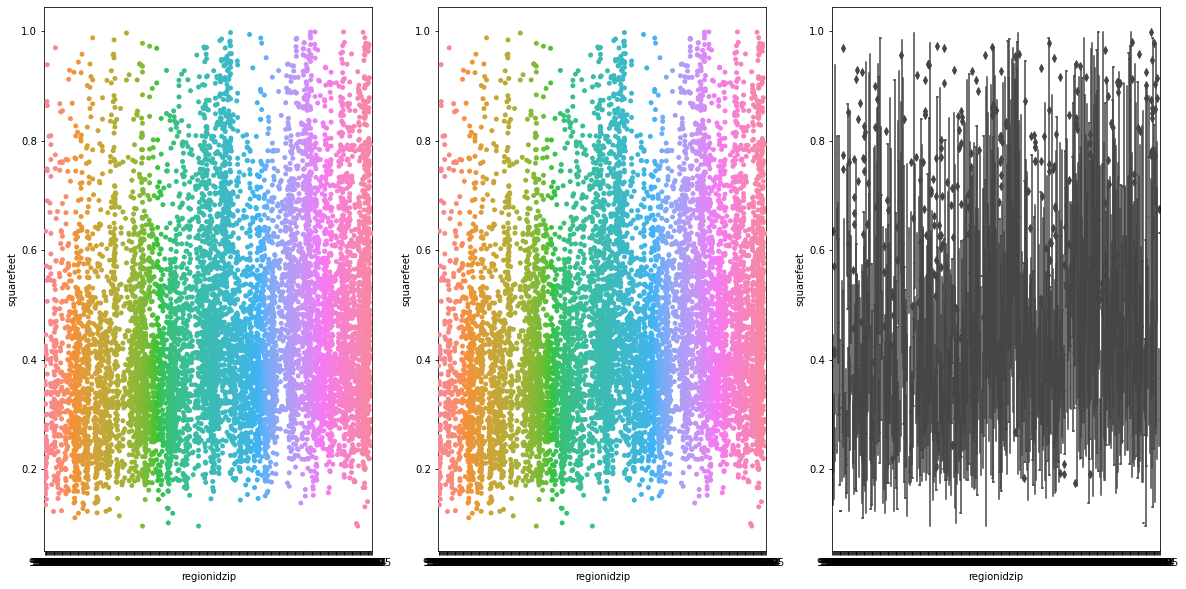

In [38]:
plot_categorical_and_continuous_vars(train.sample(10_000),continuous,categorical )

Let's do some statistical questions.  
1. Are homes with more bedrooms worth more?

In [47]:
alpha = 0.05

In [51]:
# I'm going to create some array's for this question
tax_value_2Bd = train[train.bedrooms == 2].tax_value
tax_value_5Bd = train[train.bedrooms == 5].tax_value

# Check to see if my variances are equal; (they are not)
# tax_value_2Bd.var() , tax_value_5Bd.var()

# Define my hypothesis before testing:
# H0: There is no difference in tax_value between homes with 2 bedrooms vs homes with 5 bedrooms.
# Ha: There is a difference in tax_value between homes with 2 bedrooms vs homes with 5 bedrooms.

# This is a two-sampled, two-tailed test. 
t, p = stats.ttest_ind(tax_value_2Bd, tax_value_5Bd, equal_var=False)

if p/2 < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


It didn't seem like there was much difference between home value bedrooms in the charts above, but out Two-Tailed T-Test proved otherwise. It seems more bedrooms does mean more value, which seems intuitive, but it's always good to check and see if your data agrees with you.

2. Are younger homes higher in tax_value than old homes?

In [50]:
older_homes = train[train.years_old >= train.years_old.mean()].tax_value
younger_homes = train[train.years_old < train.years_old.mean()].tax_value

In [52]:
# Define my hypothesis before testing:
# H0: Homes older than the average cost more or the same as homes younger than the average
# Ha: Homes older than the average cost less than homes younger than the average

# use stats.ttest to calculate t and p
t, p = stats.ttest_ind(older_homes, younger_homes, equal_var=False)

if p/2 < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


As we expected, the data shows that new homes have higher tax_value than older homes.

In [ ]:
select K best and stuff

1. Why do some properties have a much higher value than others when they are located so close to each other?
2. Are houses with a high bedroom count but a low bathroom count, less valueable?
3. Are houses of a certain year built more valuable than others?
4. Are there certain countys that are harder to predict taxvaluedollarcnt for?

<hr style="border:2px solid blue"> </hr>


# Modeling

<hr style="border:2px solid blue"> </hr>


# Evaluating My Models